# Lab 7

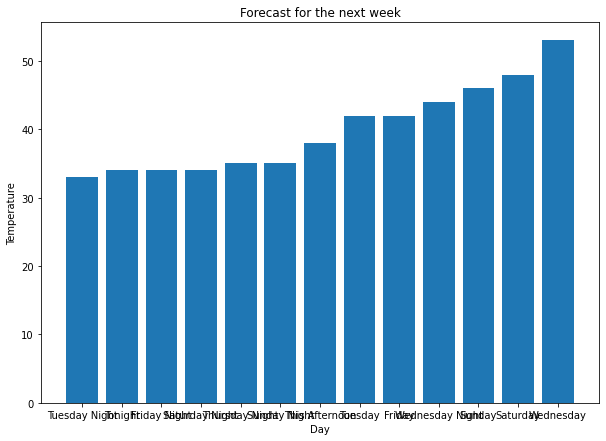

In [10]:
import requests 
import json
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


lat = "42.8864"
lon = "-78.8784"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json_1 = new_request.json()

full = json_1["properties"]["periods"]
    
weather_data = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(weather_data)
csv_writer.writerow(["Name", "Temperature", "Detailed Forecast"])

for i in full:
    name = i["name"]
    temp = i["temperature"]
    forecast = i["detailedForecast"]
    
    csv_writer.writerow([name, temp, forecast])
        
weather_data.close()

weather_sheet = pd.read_csv("weather_data.csv")
weather_sheet = weather_sheet.sort_values(by="Temperature", ascending = True)

weather_df = pd.DataFrame(weather_sheet)

plot_name = weather_df["Name"]
plot_temp = weather_df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(plot_name[0:13], plot_temp[0:13])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Forecast for the next week")

plt.show()

# Call 1

In [15]:
#API which takes a country and gathers the infromation on it's common name, official name, code, region, and border countries
#This also actually prints all the information on the border countries as well

countryCode = "LU"  #Setting country code for Luxembourg

country_info = requests.get(f"https://date.nager.at/api/v3/CountryInfo/{countryCode}")  #Requesting the API for the 
                                                                                        #country info of Luxembourg
country_info.json() #Printing the json file for the first call

{'commonName': 'Luxembourg',
 'officialName': 'Grand Duchy of Luxembourg',
 'countryCode': 'LU',
 'region': 'Europe',
 'borders': [{'commonName': 'Belgium',
   'officialName': 'Kingdom of Belgium',
   'countryCode': 'BE',
   'region': 'Europe',
   'borders': None},
  {'commonName': 'France',
   'officialName': 'French Republic',
   'countryCode': 'FR',
   'region': 'Europe',
   'borders': None},
  {'commonName': 'Germany',
   'officialName': 'Federal Republic of Germany',
   'countryCode': 'DE',
   'region': 'Europe',
   'borders': None}]}

# Call 2

In [3]:
#API which returns all the available countries, as well as thier codes
available_countries = requests.get(f"https://date.nager.at/api/v3/AvailableCountries") #Requesting API for all countries

available_countries.json() #Printing out the json file for available countries

[{'countryCode': 'AD', 'name': 'Andorra'},
 {'countryCode': 'AL', 'name': 'Albania'},
 {'countryCode': 'AR', 'name': 'Argentina'},
 {'countryCode': 'AT', 'name': 'Austria'},
 {'countryCode': 'AU', 'name': 'Australia'},
 {'countryCode': 'AX', 'name': 'Åland Islands'},
 {'countryCode': 'BA', 'name': 'Bosnia and Herzegovina'},
 {'countryCode': 'BB', 'name': 'Barbados'},
 {'countryCode': 'BE', 'name': 'Belgium'},
 {'countryCode': 'BG', 'name': 'Bulgaria'},
 {'countryCode': 'BJ', 'name': 'Benin'},
 {'countryCode': 'BO', 'name': 'Bolivia'},
 {'countryCode': 'BR', 'name': 'Brazil'},
 {'countryCode': 'BS', 'name': 'Bahamas'},
 {'countryCode': 'BW', 'name': 'Botswana'},
 {'countryCode': 'BY', 'name': 'Belarus'},
 {'countryCode': 'BZ', 'name': 'Belize'},
 {'countryCode': 'CA', 'name': 'Canada'},
 {'countryCode': 'CH', 'name': 'Switzerland'},
 {'countryCode': 'CL', 'name': 'Chile'},
 {'countryCode': 'CN', 'name': 'China'},
 {'countryCode': 'CO', 'name': 'Colombia'},
 {'countryCode': 'CR', 'name':

# Call 3

In [4]:
#API which takes a country and a year, and returns all the long weekends, with start and end date, as well as the 
#overall length. It also returns if a bridge day is needed

year = 2023 #Setting year for 2023

long_weekend = requests.get(f"https://date.nager.at/api/v3/LongWeekend/{year}/{countryCode}") #Requesting API for Luxembourg
                                                                                              #long weekends in 2023
long_weekend.json() #Printing out the json file for long weekends in Luxembourg, 2023

[{'startDate': '2023-04-08',
  'endDate': '2023-04-10',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-04-29',
  'endDate': '2023-05-01',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-05-06',
  'endDate': '2023-05-09',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-05-18',
  'endDate': '2023-05-21',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-05-27',
  'endDate': '2023-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-06-23',
  'endDate': '2023-06-25',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2023-08-12',
  'endDate': '2023-08-15',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2023-12-23',
  'endDate': '2023-12-26',
  'dayCount': 4,
  'needBridgeDay': False}]

# Call 4

In [5]:
#API which takes a country and a year, and returns all of the public holidays with both their local and common names,
#date, if the holiday is fixed, if it is global, and the counties and launch year(these are all null for Luxembourg)

public_holidays = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/{year}/{countryCode}") #Requesting API for Luxembourg
                                                                                                    #public holidays as of 2023
public_holidays.json() #Printing out the json file for public holidays inn Luxembourg as of 2023

[{'date': '2023-01-01',
  'localName': 'Neijoerschdag',
  'name': "New Year's Day",
  'countryCode': 'LU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-04-07',
  'localName': 'Karfreideg',
  'name': 'Good Friday',
  'countryCode': 'LU',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Bank']},
 {'date': '2023-04-10',
  'localName': 'Ouschterméindeg',
  'name': 'Easter Monday',
  'countryCode': 'LU',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-01',
  'localName': 'Dag vun der Aarbecht',
  'name': 'Labour Day',
  'countryCode': 'LU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-09',
  'localName': 'Europadag',
  'name': 'Europe Day',
  'countryCode': 'LU',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': 

# Call 5

In [16]:
#API which takes a country and returns a number to determine if today is a national holiday in the country

offset = 0

today_holiday = requests.get(f"https://date.nager.at/api/v3/IsTodayPublicHoliday/{countryCode}?offset={offset}")#Requesting API for
                                                                                                                #checking if today is a national holiday in Luxembourg
today_holiday #Printing out to see if today is a national holiday in Luxembourg

#<Response [204]> means that today is NOT a public holiday in Luxembourg

<Response [204]>

# Call 6

In [9]:
#API which takes a country and returns the public holidays for the next 365 days 

upcoming_holidays = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{countryCode}") #Requesting API for the upcoming holidays
                                                                                                   #in Luxembourg over the next year
upcoming_holidays.json() #Printing out the json file for the holidays in Luxembourg for the next year

# Call 7

In [10]:
#API which returns all the public holdiays throughout the next week

holidays_this_week = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidaysWorldwide") #Requesting API for the public holidays over the next week

holidays_this_week.json() #Printing out the json file for the public holidays throughout the next week

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

# Public Holiday info for 10 countries

In [17]:
country_codes = ["IT", "EG", "BO", "BR", "HR", "HU", "JM", "MX", "NO", "US"]

for i in country_codes:
    upcoming_holidays = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{i}")
    
    holidays_upcoming = upcoming_holidays.json()
    
    print(holidays_upcoming)
    
    number_holidays = len(holidays_upcoming)
    
    print(f"NUMBER OF HOLIDAYS: {number_holidays}")
    
    print("...")
    

[{'date': '2023-04-09', 'localName': 'Pasqua', 'name': 'Easter Sunday', 'countryCode': 'IT', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-10', 'localName': "Lunedì dell'Angelo", 'name': 'Easter Monday', 'countryCode': 'IT', 'fixed': False, 'global': True, 'counties': None, 'launchYear': 1642, 'types': ['Public']}, {'date': '2023-04-25', 'localName': 'Festa della Liberazione', 'name': 'Liberation Day', 'countryCode': 'IT', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'Festa del Lavoro', 'name': 'International Workers Day', 'countryCode': 'IT', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-06-02', 'localName': 'Festa della Repubblica', 'name': 'Republic Day', 'countryCode': 'IT', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-

[{'date': '2023-04-09', 'localName': 'Uskrs i uskrsni ponedjeljak', 'name': 'Easter Sunday', 'countryCode': 'HR', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-04-10', 'localName': 'Uskrs i uskrsni ponedjeljak', 'name': 'Easter Monday', 'countryCode': 'HR', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-01', 'localName': 'Međunarodni praznik rada', 'name': "International Workers' Day", 'countryCode': 'HR', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-05-30', 'localName': 'Dan državnosti', 'name': 'National Day', 'countryCode': 'HR', 'fixed': True, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}, {'date': '2023-06-08', 'localName': 'Tijelovo', 'name': 'Corpus Christi', 'countryCode': 'HR', 'fixed': False, 'global': True, 'counties': None, 'launchYear': None, 'types': ['Public']}

# Bonus Questions

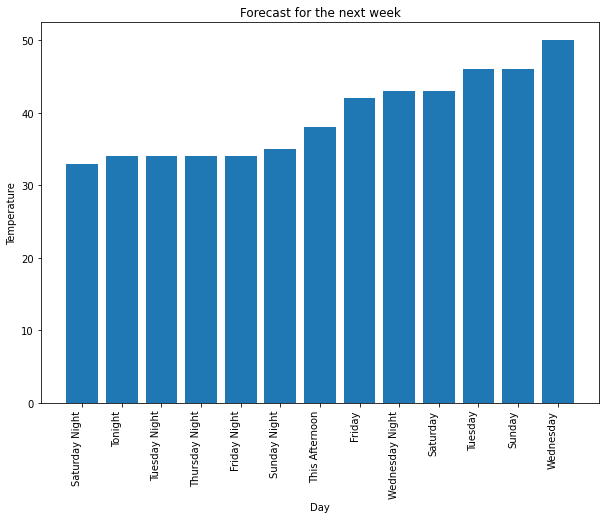

In [12]:
lat = "42.8864"
lon = "-78.8784"
genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")

json_file = genius.json()

forecast = json_file["properties"]["forecast"]
new_request = requests.get(forecast)

json_1 = new_request.json()

full = json_1["properties"]["periods"]
    
weather_data = open("weather_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(weather_data)
csv_writer.writerow(["Name", "Temperature", "Detailed Forecast"])

for i in full:
    name = i["name"]
    temp = i["temperature"]
    forecast = i["detailedForecast"]
    
    csv_writer.writerow([name, temp, forecast])
        
weather_data.close()

weather_sheet = pd.read_csv("weather_data.csv")
weather_sheet = weather_sheet.sort_values(by="Temperature", ascending = True)

weather_df = pd.DataFrame(weather_sheet)

plot_name = weather_df["Name"]
plot_temp = weather_df["Temperature"]

fig = plt.figure(figsize = (10,7))
plt.bar(plot_name[0:13], plot_temp[0:13])
plt.xticks(rotation=90, ha='right')
        
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Forecast for the next week")


plt.show()

#To make the x-axis labels less crowded, using https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
#I found how to rotate the "xticks," which allows them to not run into one another

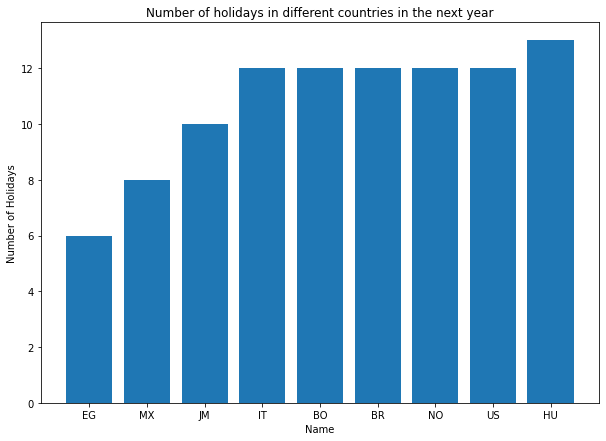

In [13]:
number_holidays_data = open("holiday_data.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(number_holidays_data)
csv_writer.writerow(["Name", "Number of Holidays"])

country_codes = ["IT", "EG", "BO", "BR", "HR", "HU", "JM", "MX", "NO", "US"]

for i in country_codes:
    upcoming_holidays = requests.get(f"https://date.nager.at/api/v3/NextPublicHolidays/{i}")
    
    holidays_upcoming = upcoming_holidays.json()
    
    name = i
    
    number_holidays = len(holidays_upcoming)
    
    csv_writer.writerow([name, number_holidays])
    
number_holidays_data.close()

holiday_sheet = pd.read_csv("holiday_data.csv")
holiday_sheet = holiday_sheet.sort_values(by = "Number of Holidays", ascending = True)

holiday_df = pd.DataFrame(holiday_sheet)

plot2_name = holiday_df["Name"]
plot2_number = holiday_df["Number of Holidays"]

fig = plt.figure(figsize = (10,7))
plt.bar(plot2_name[0:9], plot2_number[0:9])

plt.xlabel("Name")
plt.ylabel("Number of Holidays")
plt.title("Number of holidays in different countries in the next year")


plt.show()